<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [75]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


SessionID                  0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Weekend                    0
Month                      0
CustomerType               1
Purchase                   1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   Produc

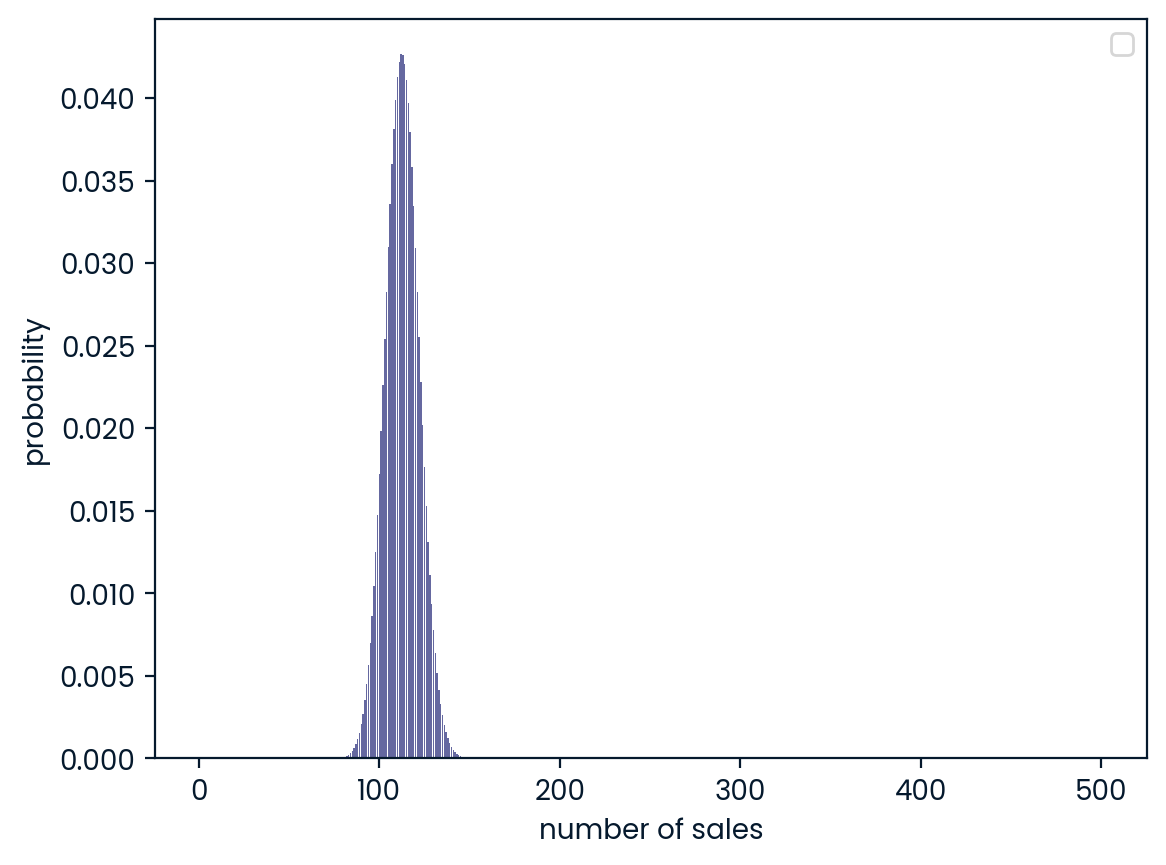

In [76]:
# Check for missing values and info about the dataset
print(shopping_data.isna().sum())
print(shopping_data.info())

# Filter data in order to keep only November and December
shopping_ND = shopping_data[shopping_data["Month"].isin(["Nov","Dec"])] 
print(shopping_ND.head())

# Find the amount of session and calculate the purchase_rates by customer type
n_sessions_new = len(shopping_ND[shopping_ND["CustomerType"]== "New_Customer"])
n_sessions_ret= len(shopping_ND[shopping_ND["CustomerType"]== "Returning_Customer"])
purchases = shopping_ND.groupby("CustomerType")["Purchase"].sum()
print(purchases)
New_Customer = round(199 / n_sessions_new,3)
Returning_Customer = round(728 / n_sessions_ret,3)
print(New_Customer)
print(Returning_Customer)

#Save purchase rates in the dictionary
purchase_rates = {"Returning_Customer": 0.196, "New_Customer": 0.273}

#Filter the Nov and Dec dataframe for only Returning_Customer
shopping_ND_return = shopping_ND[shopping_ND["CustomerType"] == "Returning_Customer"]

#Calculate correlations between time columns
Admin_Info_corr = round(shopping_ND["Administrative_Duration"].corr(shopping_ND["Informational_Duration"]),3)
Info_Product_corr = round(shopping_ND["Informational_Duration"].corr(shopping_ND["ProductRelated_Duration"]),3)
Admin_Product_corr = round(shopping_ND["Administrative_Duration"].corr(shopping_ND["ProductRelated_Duration"]),3)
print(Admin_Info_corr)
print(Admin_Product_corr)
print(Info_Product_corr) 

top_correlation = {"pair": ("Informational_Duration", "ProductRelated_Duration"),"correlation":0.39}

#Current purchase rate of the returning customer
print(f"Current proabability of purchase of returning customer: {Returning_Customer}.")

#New increased purchase rate for returning customer
new_pr_return = Returning_Customer * 1.15
print(f"New increased probability of purchase of returning cutomer: {new_pr_return}.")

#Find the probablity of less than 100 sales
prob_less_100_sales = stats.binom.cdf(k=100, n=500, p=new_pr_return)

#Find the probability of more than 100 sales
prob_more_100_sales = 1 - prob_less_100_sales
print("The probability of achieving more than 100 sales is:",prob_more_100_sales)

#Plot the binomial distribution
n = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k,n,new_pr_return) for k in k_values]
plt.bar(k_values,p_binom_values)
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()